In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import sys
import matplotlib.pyplot as plt

In [98]:
df=pd.read_csv("AdmissionDataset/data.csv")

In [99]:
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
Y = df['Chance of Admit ']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
# Y_train

In [100]:
lr = LinearRegression()
lr.fit(X_train, Y_train) 
y_pred = lr.predict(X_test)
print(r2_score(Y_test,y_pred))

0.7616482770773243


In [101]:
X_train = (X_train - X_train.mean())/X_train.std()
# Y_train = (Y_train - Y_train.mean())/Y_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
# Y_test = (Y_test - Y_test.mean())/Y_test.std()
# X_train

In [102]:
X_train = pd.concat([X_train,Y_train],axis=1)
ones = np.ones([X_train.shape[0],1])
Y_train = X_train.iloc[:,7:8].values
X_train = X_train.iloc[:,0:7]
X_train = np.concatenate((ones,X_train),axis=1)

In [103]:
learning_rate = 0.01
iterations = 1000
theta = np.zeros([1,8])

In [104]:
def computeCost(x,y,theta):
    total = np.power(((x @ theta.T)-y),2)
    return np.sum(total)/(2 * len(x))

In [105]:
costList = []

In [106]:
def gradient_decent(X_train,Y_train,theta,learning_rate,iterations):
    
    for i in range(iterations):
        theta = theta - (learning_rate/len(X_train)) * np.sum(X_train * (X_train @ theta.T - Y_train), axis=0)
        costList.append(computeCost(X_train,Y_train,theta))
    return theta

In [107]:
g = gradient_decent(X_train,Y_train,theta,learning_rate,iterations)
g = g[0]

Text(0.5, 1.0, 'Cost vs Iterations')

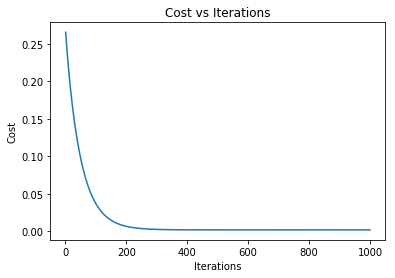

In [108]:
fig, ax = plt.subplots() 
itrs = []
for i in range(1,1001):
    itrs.append(i)
ax.plot(itrs, costList)  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Cost vs Iterations')